In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
%pylab inline

plt.rcParams['figure.figsize'] = (25, 15)
qback = pd.read_csv("QBStats_all.csv",sep=',')

Populating the interactive namespace from numpy and matplotlib


* Quarterback Name (qb)
* Attempts (att)
* Completions (cmp)
* Yards (yds)
* Yards per Attempt (ypa)
* Touchdowns (td)
* Interceptions (int)
* Sacks (sack)
* Loss of Yards (loss)
* The NFL's Quarterback Rating for the game (rate)
* Total points scored in the game (game_points)
* Home or Away Game (home_away)
* Year (year)

In [2]:
#original data
print(qback)

                                   qb  att  cmp    yds   ypa  td  int  sack  \
0            Boomer EsiasonB. Esiason   38   25  237.0   6.2   0  0.0   2.0   
1             Jim HarbaughJ. Harbaugh   25   16  196.0   7.8   2  1.0   0.0   
2                Paul JustinP. Justin    8    5   53.0   6.6   0  0.0   1.0   
3                Jeff GeorgeJ. George   35   16  215.0   6.1   0  0.0   7.0   
4             Kerry CollinsK. Collins   31   17  198.0   6.4   2  0.0   4.0   
5                  Jeff BlakeJ. Blake   40   23  226.0   5.7   1  2.0   3.0   
6                 Steve WalshS. Walsh   35   13  154.0   4.4   0  1.0   2.0   
7           Scott MitchellS. Mitchell   41   20  260.0   6.3   1  4.0   3.0   
8                Mark RoyalsM. Royals    1    1   -8.0  -8.0   0  0.0   0.0   
9              Brad JohnsonB. Johnson   23   16  157.0   6.8   1  0.0   1.0   
10                 Warren MoonW. Moon   14    5   57.0   4.1   0  0.0   3.0   
11                  Steve BonoS. Bono   37   21  192

In [49]:
#to check which column has missing data/NaNs
qback.isnull().sum()

qb              0
att             0
cmp             0
yds             0
ypa             0
td              0
int            17
sack           17
loss           17
rate           17
game_points     0
home_away       0
year            0
dtype: int64

In [44]:
#to check total number of missing data/NaNs
qback.isnull().sum().sum()

68

In [45]:
#idntifying the missing data
nan_rows = qback[qback.isnull().any(1)]
print(nan_rows)

                                      qb  att  cmp   yds   ypa  td  int  sack  \
8593                   Tatum BellT. Bell   16   46  2.88  17.0   1  NaN   NaN   
8594           Michael PittmanM. Pittman    8   40  5.00  20.0   0  NaN   NaN   
8595           Shaud WilliamsS. Williams    7   31  4.43  17.0   0  NaN   NaN   
8596        Brooks BollingerB. Bollinger    2    3  1.50   4.0   0  NaN   NaN   
8597             Chris GreisenC. Greisen    1   -1 -1.00  -1.0   0  NaN   NaN   
8598               Shannon WoodsS. Woods   12   32  2.67   7.0   0  NaN   NaN   
8599                   Quinn GrayQ. Gray    2   10  5.00   8.0   0  NaN   NaN   
8600                   Charles AliC. Ali    3    7  2.33   4.0   0  NaN   NaN   
8601               Ingle MartinI. Martin    3    4  1.33   8.0   0  NaN   NaN   
8602       LaBrandon ToefieldL. Toefield    3   -1 -0.33   1.0   0  NaN   NaN   
8644           Michael PittmanM. Pittman   18   58  3.22   9.0   2  NaN   NaN   
8645                   Tatum

In [12]:
#column interceptions is named "int", which is a reserved word, hence renaming it
#to rename any variable
qback.rename(columns={'int': 'intr'}, inplace=True)
print(qback)

                                   qb  att  cmp    yds   ypa  td  intr  sack  \
0            Boomer EsiasonB. Esiason   38   25  237.0   6.2   0   0.0   2.0   
1             Jim HarbaughJ. Harbaugh   25   16  196.0   7.8   2   1.0   0.0   
2                Paul JustinP. Justin    8    5   53.0   6.6   0   0.0   1.0   
3                Jeff GeorgeJ. George   35   16  215.0   6.1   0   0.0   7.0   
4             Kerry CollinsK. Collins   31   17  198.0   6.4   2   0.0   4.0   
5                  Jeff BlakeJ. Blake   40   23  226.0   5.7   1   2.0   3.0   
6                 Steve WalshS. Walsh   35   13  154.0   4.4   0   1.0   2.0   
7           Scott MitchellS. Mitchell   41   20  260.0   6.3   1   4.0   3.0   
8                Mark RoyalsM. Royals    1    1   -8.0  -8.0   0   0.0   0.0   
9              Brad JohnsonB. Johnson   23   16  157.0   6.8   1   0.0   1.0   
10                 Warren MoonW. Moon   14    5   57.0   4.1   0   0.0   3.0   
11                  Steve BonoS. Bono   

In the dataset, there are approx 13000 rows in which there are NaNs in only 14 rows. We cannot replace NaNs with the mean of the column because every row contains data from different player. Hence there is no meaning in taking mean as it will be calculated using different player's data and hence will be erroneous. Therefore it is better to replace with zero as it will be counted as the player failed to score any sacks or interceptions.

In [100]:
 #to replace NaNs with 0s
qback.fillna(0, inplace=True)

In [15]:
qback.head(8650)

,qb,att,cmp,yds,ypa,td,int,sack,loss,rate,game_points,home_away,year
0,Boomer EsiasonB. Esiason,38,25,237.00,6.2,0,0.0,2.0,11.0,82.9,13,away,1996
1,Jim HarbaughJ. Harbaugh,25,16,196.00,7.8,2,1.0,0.0,0.0,98.1,20,home,1996
2,Paul JustinP. Justin,8,5,53.00,6.6,0,0.0,1.0,11.0,81.8,20,home,1996
3,Jeff GeorgeJ. George,35,16,215.00,6.1,0,0.0,7.0,53.0,65.8,6,away,1996
4,Kerry CollinsK. Collins,31,17,198.00,6.4,2,0.0,4.0,12.0,95.9,29,home,1996
5,Jeff BlakeJ. Blake,40,23,226.00,5.7,1,2.0,3.0,21.0,61.0,16,away,1996
6,Steve WalshS. Walsh,35,13,154.00,4.4,0,1.0,2.0,15.0,39.5,26,home,1996
7,Scott MitchellS. Mitchell,41,20,260.00,6.3,1,4.0,3.0,8.0,37.7,13,away,1996
8,Mark RoyalsM. Royals,1,1,-8.00,-8.0,0,0.0,0.0,0.0,79.2,13,away,1996
9,Brad JohnsonB. Johnson,23,16,157.00,6.8,1,0.0,1.0,7.0,103.0,17,home,1996


In [8]:
qback.isnull().sum()

qb             0
att            0
cmp            0
yds            0
ypa            0
td             0
int            0
sack           0
loss           0
rate           0
game_points    0
home_away      0
year           0
dtype: int64

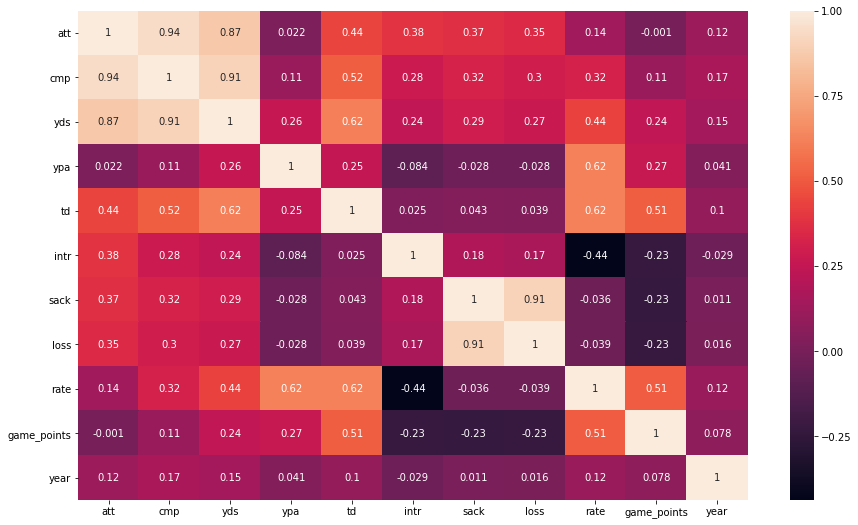

In [68]:
#to check for highly correlated variables, heatmap was plotted

corr=qback.corr()
sns.heatmap(corr,annot=True)

Highly correlated variables are - 

att : cmp

sack : loss

In [75]:
#to identify variables with least variance
qback.var(axis=0)

att              184.524819
cmp               77.000411
yds            11157.670245
ypa               17.861670
td                 1.253654
int                0.941548
sack               2.893712
loss             143.282164
rate            1028.357991
game_points      113.720733
year              36.154870
dtype: float64

interceptions(int) has the least variance

variables with strange names or values

The column Yards has some values which are negative. It seems like yards covered can never be a negative value but with respect to NHL, if a player gets sacked, his total yards gets reduced and hence can take negative values.

In [17]:
#to check summary statistics:
qback.describe()

,att,cmp,yds,ypa,td,int,sack,loss,rate,game_points,year
count,13188.000000,13188.000000,13188.000000,13188.000000,13188.000000,13188.000000,13188.000000,13188.000000,13188.000000,13188.000000,13188.000000
mean,26.870488,16.121777,186.135118,6.882909,1.118138,0.800880,1.860707,11.955793,80.139134,21.379436,2005.898923
std,13.583991,8.774988,105.629874,4.226307,1.119667,0.970135,1.701308,11.970044,32.176424,10.663992,6.012892
min,0.000000,-6.000000,-11.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.000000
25%,20.000000,11.000000,115.000000,5.200000,0.000000,0.000000,0.000000,0.000000,58.500000,13.000000,2001.000000
50%,29.000000,17.000000,197.000000,6.700000,1.000000,1.000000,2.000000,9.000000,80.900000,21.000000,2006.000000
75%,36.000000,22.000000,260.000000,8.100000,2.000000,1.000000,3.000000,18.000000,101.925000,28.000000,2011.000000
max,69.000000,58.000000,527.000000,81.000000,7.000000,7.000000,12.000000,91.000000,158.300000,62.000000,2016.000000


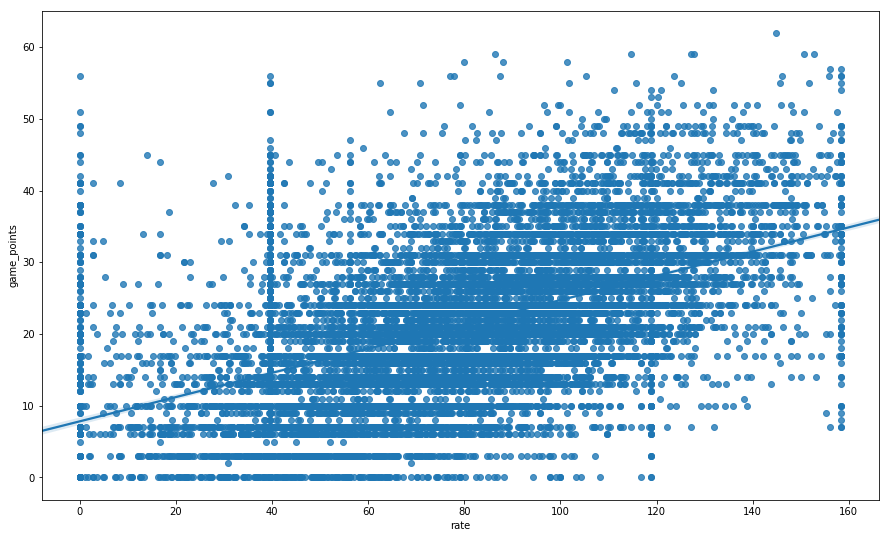

In [111]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.regplot(x="rate", y="game_points", data=qback)

Here in this regression plot, we can see the linear relation between rating of the quarterback and the points scored in the game. The more points score, the more rating the quarterback recieved. However, we can even see that a high rating quarterback game has very low points scored in the game. The reason for this can be that it may be a pretty low scoring game for both the teams.

(array([  4.79600000e+03,   0.00000000e+00,   0.00000000e+00,
          4.15300000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.66200000e+03,   0.00000000e+00,
          0.00000000e+00,   1.14600000e+03,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   3.44000000e+02,
          0.00000000e+00,   0.00000000e+00,   7.00000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.40000000e+01,   0.00000000e+00,   0.00000000e+00,
          3.00000000e+00]),
 array([ 0.  ,  0.28,  0.56,  0.84,  1.12,  1.4 ,  1.68,  1.96,  2.24,
         2.52,  2.8 ,  3.08,  3.36,  3.64,  3.92,  4.2 ,  4.48,  4.76,
         5.04,  5.32,  5.6 ,  5.88,  6.16,  6.44,  6.72,  7.  ]),
 <a list of 25 Patch objects>)

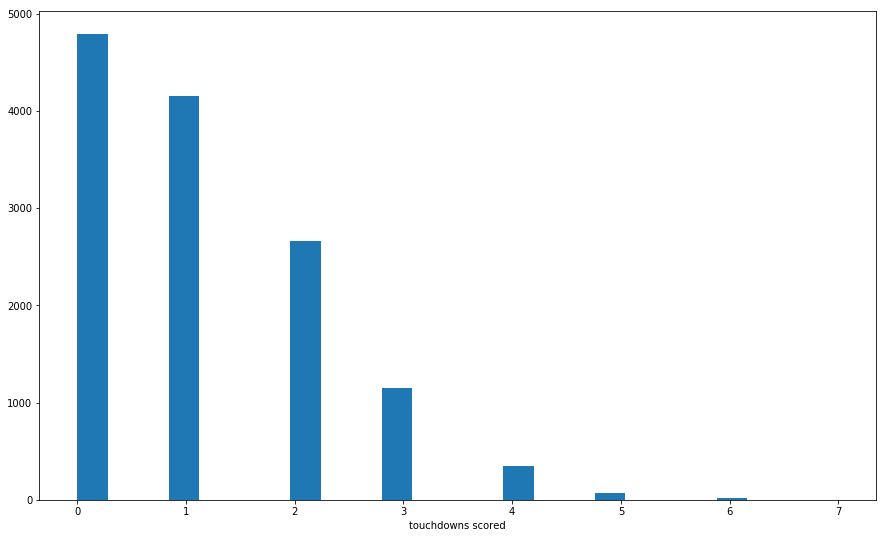

In [120]:
x = qback['td']
plt.xlabel('touchdowns scored');
plt.hist(x, bins=25)

From this histogram plot, we can see that the touchdows scored by quarterbacks is exponentially distributed i.e. the number of qbacks decreased as the touchdown count went high.

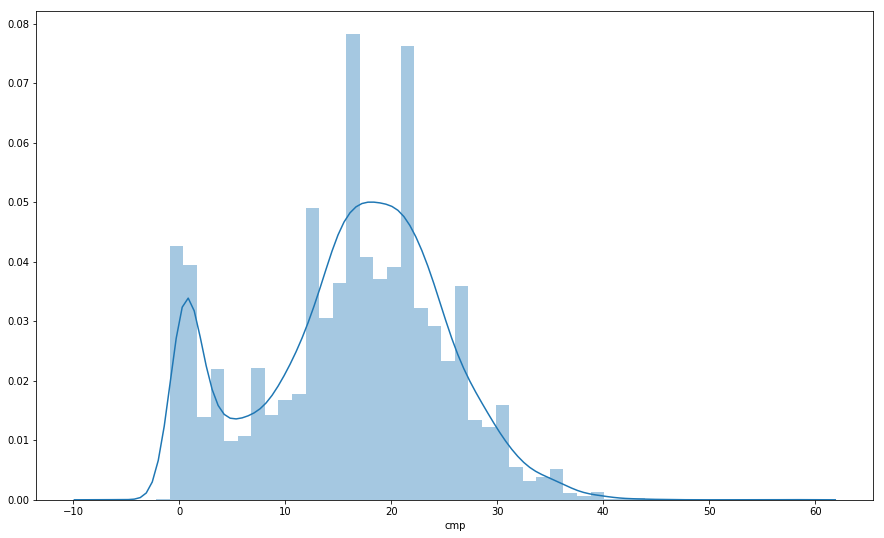

In [88]:
sns.distplot(qback['cmp'])

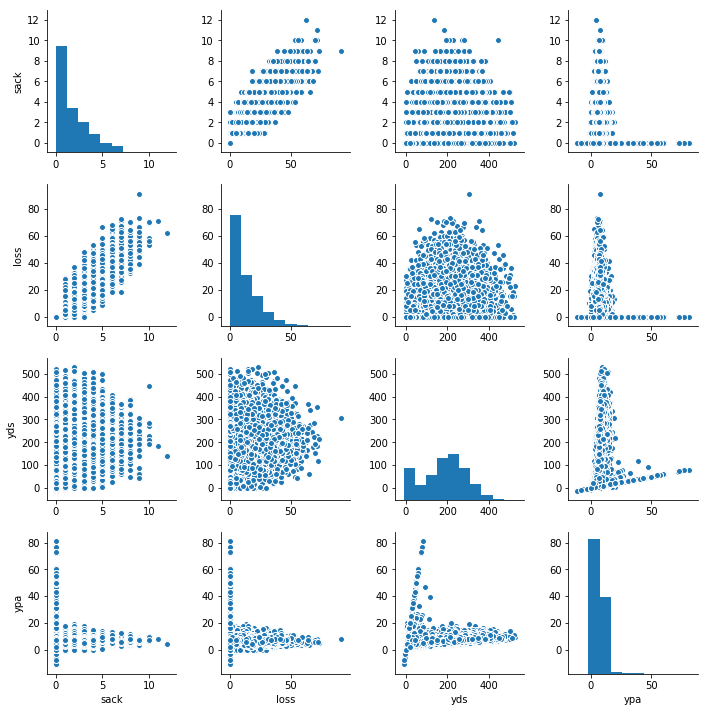

In [105]:
sns.pairplot(qback, vars=['sack', 'loss', 'yds','ypa'])
plt.show()

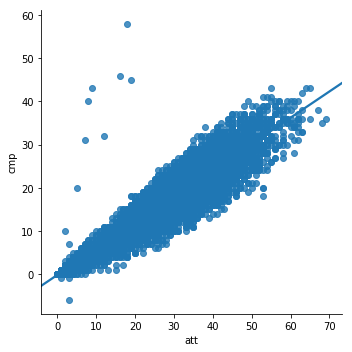

In [101]:
sns.lmplot(x='att',y='cmp',data = qback)

LM plot is used to visualize linear relationship between any 2 variables. From the plot we can see that throw attempts made and completed throws are lineraly related.

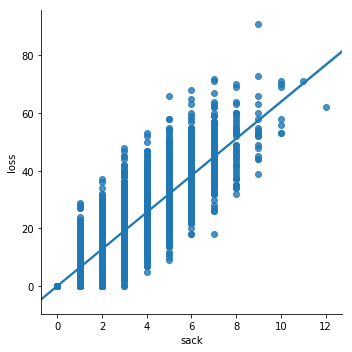

In [108]:
sns.lmplot(x='sack',y='loss',data = qback)

In NHL, whenever a quarterback is sacked, he losses his total yards. Here, we can see that as the number of sacks increased, the number of yards lost by the quarterback also increased which is quiet a desired result. This plot too is linearly distributed.

(array([  1.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   7.54000000e+02,
          1.16000000e+02,   5.94000000e+02,   2.40700000e+03,
          4.61600000e+03,   2.90800000e+03,   1.07700000e+03,
          3.03000000e+02,   1.15000000e+02,   5.90000000e+01,
          4.50000000e+01,   2.20000000e+01,   2.30000000e+01,
          8.00000000e+00,   2.30000000e+01,   2.20000000e+01,
          8.00000000e+00,   9.00000000e+00,   9.00000000e+00,
          2.00000000e+00,   9.00000000e+00,   7.00000000e+00,
          7.00000000e+00,   8.00000000e+00,   6.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
        

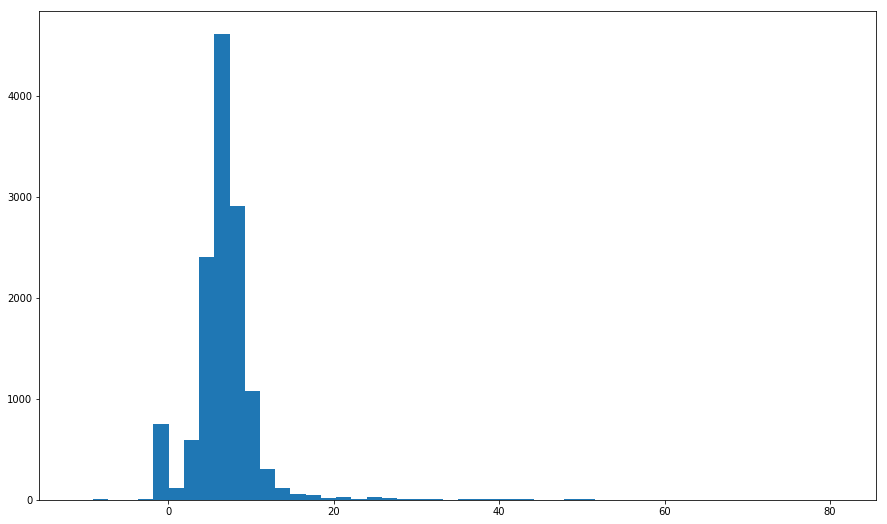

In [114]:
x = qback['ypa']
plt.hist(x, bins = 50)

In [34]:
qback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13188 entries, 0 to 13187
Data columns (total 13 columns):
qb             13188 non-null object
att            13188 non-null int64
cmp            13188 non-null int64
yds            13188 non-null float64
ypa            13188 non-null float64
td             13188 non-null int64
int            13171 non-null float64
sack           13171 non-null float64
loss           13171 non-null float64
rate           13171 non-null float64
game_points    13188 non-null int64
home_away      13188 non-null object
year           13188 non-null int64
dtypes: float64(6), int64(5), object(2)
memory usage: 1.3+ MB


In [15]:
#interceptions made by a player will always be a whole number. Hence converting the datatype to int from float
#similarly, number if sacks will also be a whole number always. Hence, converting that to int from float too.
qback['intr'] = qback['intr'].astype(int)
qback['sack'] = qback['sack'].astype(int)
qback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13188 entries, 0 to 13187
Data columns (total 13 columns):
qb             13188 non-null object
att            13188 non-null int64
cmp            13188 non-null int64
yds            13188 non-null float64
ypa            13188 non-null float64
td             13188 non-null int64
intr           13188 non-null int64
sack           13188 non-null int64
loss           13188 non-null float64
rate           13188 non-null float64
game_points    13188 non-null int64
home_away      13188 non-null object
year           13188 non-null int64
dtypes: float64(4), int64(7), object(2)
memory usage: 1.3+ MB


Checking for outliers:

I am using box plot to check for outliers. In boxplot, outliers are usually above 1.5 * IQR(inter quartile range). I will plot boxplots for different columns:

Text(0,0.5,'Sacks')

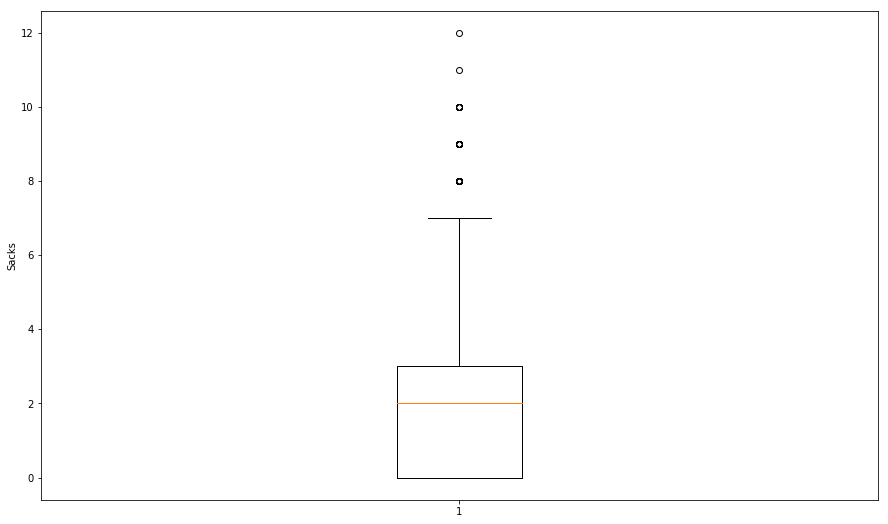

In [39]:
#checking outliers for 'sack'
plt.rcParams['figure.figsize'] = (15, 9)

x = qback['sack']
plt.boxplot(x)
plt.ylabel('Sacks')

We can see some values above 9 which is more than 1.5 * IQR, hence there are outliers in the sack column.

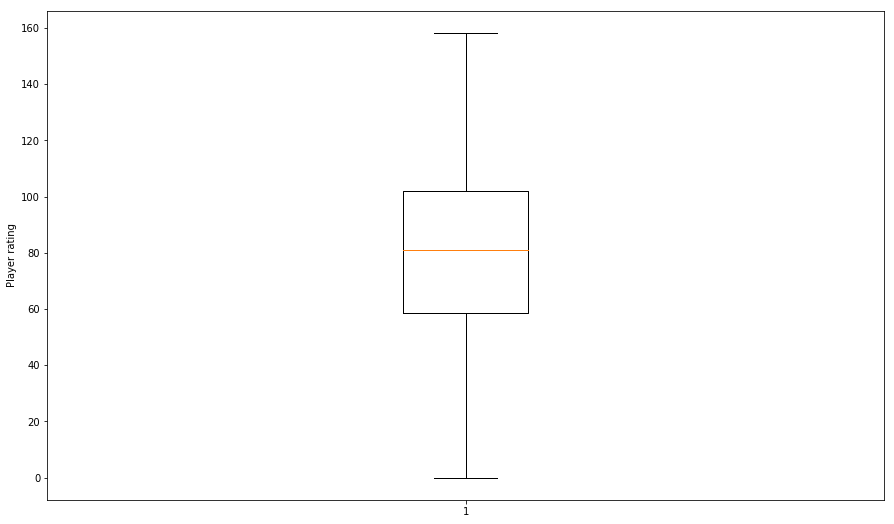

In [40]:
#checking outliers for 'rate'

x = qback['rate']
plt.boxplot(x)
plt.ylabel('Player rating');

We cannot see any values above 1.5 * IQR, hence there are no outliers in the rate column.

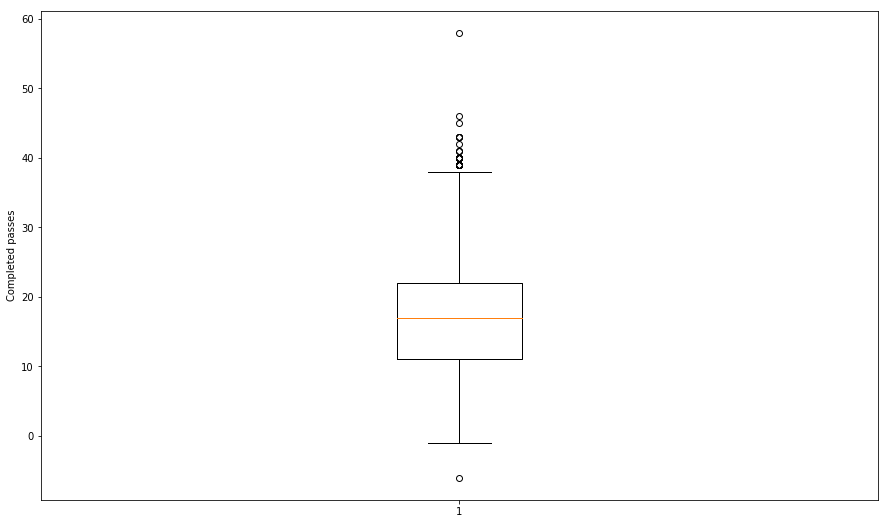

In [41]:
#checking outliers for 'cmp'

x = qback['cmp']
plt.boxplot(x)
plt.ylabel('Completed passes');

We can definitely see some values which are way above the 1.5*IQR, hence there are outliers in the completed pass column.

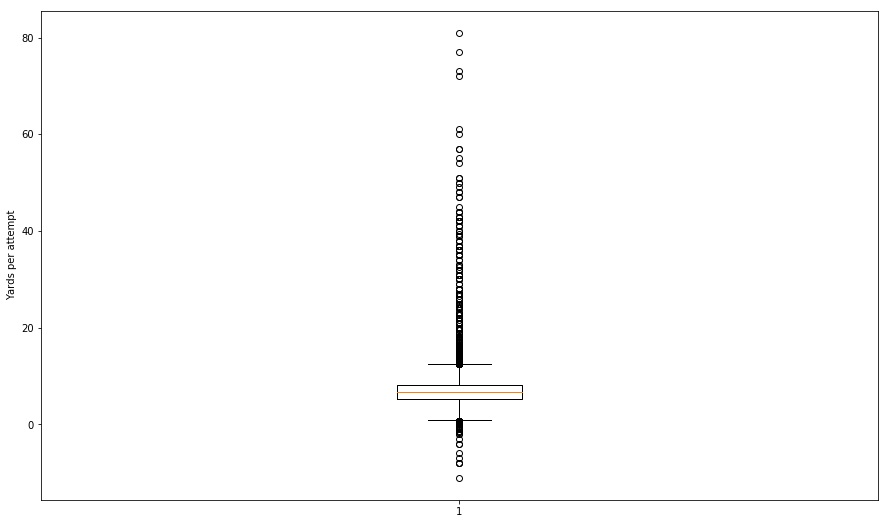

In [122]:
#checking outliers for 'yards per attempt'

x = qback['ypa']
plt.boxplot(x)
plt.ylabel('Yards per attempt');

In this plot, we can evidently see the outliers on both sides of the IQR. This plot has the max number of outliers.

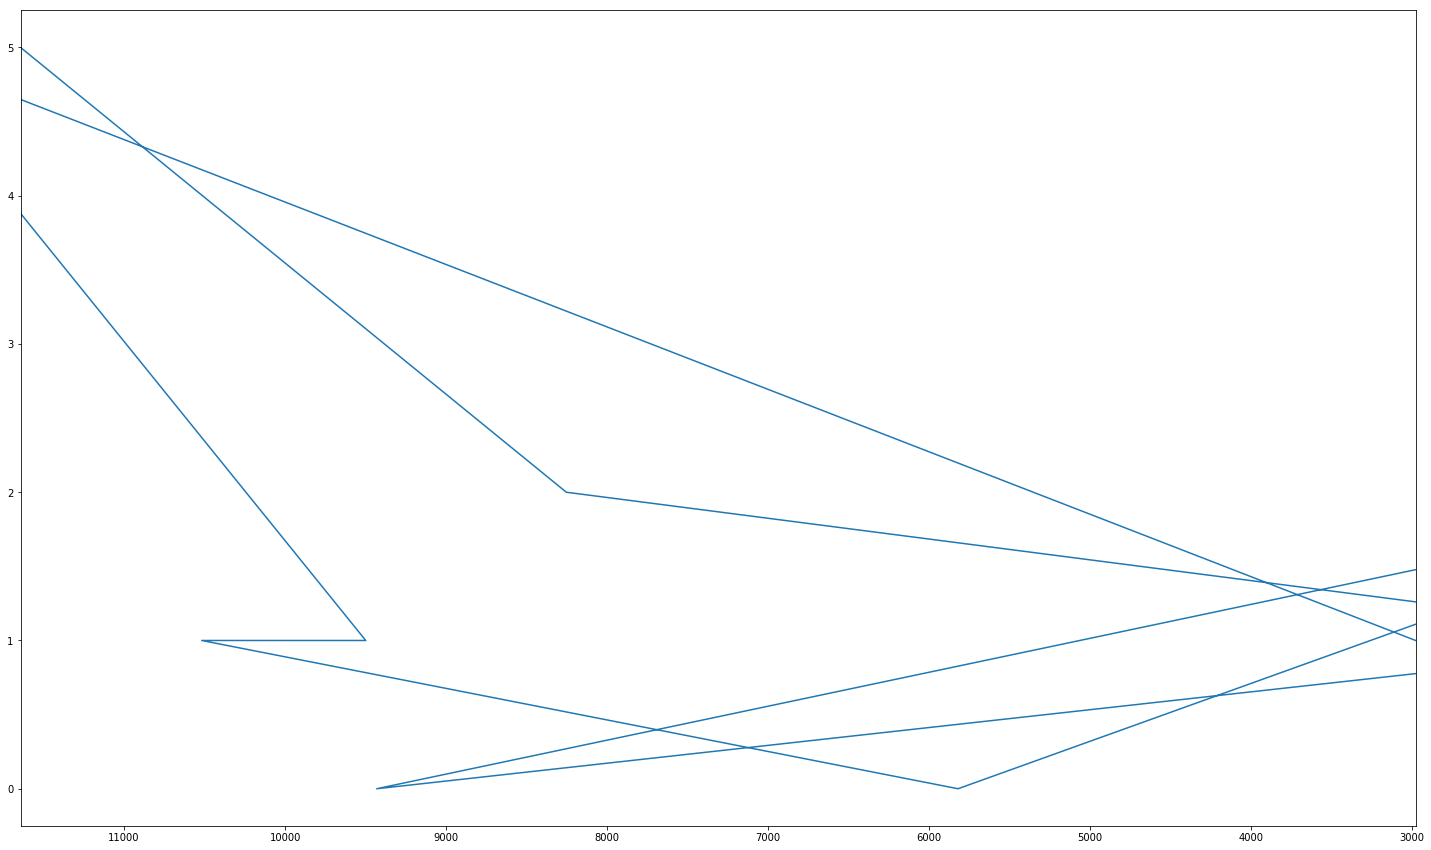

In [25]:
qqback = qback.sample(n=100, random_state=25, axis = 0)
trii = qqback["att"]
trii.plot()
#qqback.plot()